In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
data_hearth = pd.read_csv("../input/heart.csv")
data_hearth.head(10)
data = data_hearth

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [5]:
x,y = data_hearth.loc[:,data_hearth.columns != 'target'], data_hearth.loc[:,'target']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

**KNN**

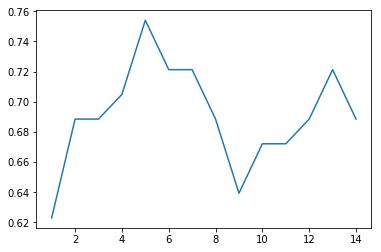

In [6]:
from sklearn.neighbors import KNeighborsClassifier
scores=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    scores.append(knn2.score(x_test,y_test))
  
plt.plot(range(1,15),scores)
plt.show()

In [7]:

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
predictions = knn.predict(x_test)
acc = knn.score(x_test,y_test)*100
print(acc)

70.49180327868852


*We should'nt use KNN :)

**ANN**

Lets try neural networks.

In [8]:
# from tensorflow import set_random_seed
# set_random_seed(101)
import tensorflow
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 500)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()


Using TensorFlow backend.


Epoch 1/500
161/161 [==============================] - 1s 5ms/step - loss: 0.6936 - acc: 0.4224
Epoch 2/500
161/161 [==============================] - 0s 56us/step - loss: 0.6929 - acc: 0.5776
Epoch 3/500
161/161 [==============================] - 0s 60us/step - loss: 0.6924 - acc: 0.5776
Epoch 4/500
161/161 [==============================] - 0s 59us/step - loss: 0.6922 - acc: 0.5776
Epoch 5/500
161/161 [==============================] - 0s 62us/step - loss: 0.6918 - acc: 0.5776
Epoch 6/500
161/161 [==============================] - 0s 58us/step - loss: 0.6918 - acc: 0.5776
Epoch 7/500
161/161 [==============================] - 0s 62us/step - loss: 0.6916 - acc: 0.5776
Epoch 8/500
161/161 [==============================] - 0s 60us/step - loss: 0.6910 - acc: 0.5776
Epoch 9/500
161/161 [==============================] - 0s 59us/step - loss: 0.6905 - acc: 0.5776
Epoch 10/500
161/161 [==============================] - 0s 67us/step - loss: 0.6898 - acc: 0.5776
Epoch 11/500
161/161 [========

In [9]:
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Accuracy mean: 0.7853909482190639
Accuracy variance: 0.10157567222702635


Thanks for your reading. If you support me just vote up and leave a comment. Have a nice day.